In [1]:
## 引入包
import qutip
from qutip import *
%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import matplotlib.ticker as ticker
import numpy as np               # Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output

import arc #Import ARC (Alkali Rydberg Calculator)
from arc import *

atom= Rubidium87()

In [12]:
g=basis(4,0)
inte=basis(4,1)
r=basis(4,2)
r_prime=basis(4,3)

psi0=g 
rho_gg=g*g.dag()
rho_rr=r*r.dag()
rho_ee=inte*inte.dag()
rho_gr=g*r.dag()
rho_rpr=r_prime*r.dag()
rho_rprp=r_prime*r_prime.dag()

gamma_b=1/(40e-6)
gamma_r=1/(80e-6)
gamma_bb=1/(230e-6)

Delta=600e6
Omega_ge=60e6
Omega_er=40e6 


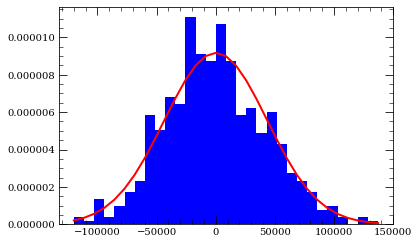

In [3]:
sigma=4.35e4
test=np.random.normal(0,sigma,600)
count, bins, ignored= plt.hist(test,30,density=True, color='b')

plt.plot(bins,1/sigma/np.sqrt(2*np.pi)*np.exp(-bins**2/2/sigma**2),linewidth=2,color='r')
plt.show()


## The next block is just for test.

In [5]:
delta_D=np.random.normal(0,sigma)
H=2*np.pi*(delta_D*rho_gg+Delta*inte*inte.dag()+Omega_ge/2.0*(g*inte.dag()+inte*g.dag())+Omega_er/2*(inte*r.dag()+r*inte.dag())+(Omega_er**2-Omega_ge**2)/4/Delta*r*r.dag())
print(H/2/np.pi)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 4.76091530e+04  3.00000000e+07  0.00000000e+00  0.00000000e+00]
 [ 3.00000000e+07  6.00000000e+08  2.00000000e+07  0.00000000e+00]
 [ 0.00000000e+00  2.00000000e+07 -8.33333333e+05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [10]:
x=np.zeros(1000)
times = np.linspace(0,30e-6,1000)
rep=50
delta_D=0
H=2*np.pi*(delta_D*rho_gg+Delta*inte*inte.dag()+Omega_ge/2.0*(g*inte.dag()+inte*g.dag())+Omega_er/2*(inte*r.dag()+r*inte.dag())+(Omega_er**2-Omega_ge**2)/4/Delta*r*r.dag())

for i in range(rep):
    delta_D=np.random.normal(0,sigma)
    
    result = mesolve(H, psi0, times,[np.sqrt(gamma_b)*rho_gg,np.sqrt(gamma_r)*rho_gr,np.sqrt(gamma_bb)*rho_rpr], [rho_rr])

    x=np.vstack((result.expect[0],x))
    

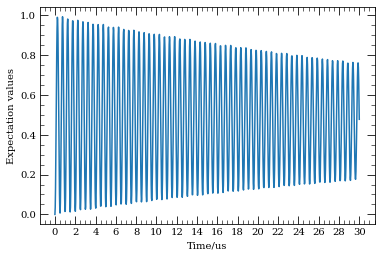

[0.         0.03430743 0.13289127 0.28293574 0.46396341 0.65012004
 0.81420026 0.9325133  0.98895792 0.97703086 0.89965655 0.76780313
 0.59889455 0.41527315 0.24212091 0.10422005 0.02180245 0.00673379
 0.06048675 0.17452523 0.33249073 0.51295102 0.69187266 0.84492077
 0.95022019 0.99178981 0.96286343 0.86768301 0.72076628 0.54387282
 0.36197191 0.19962866 0.07838415 0.01473729 0.01811686 0.08890707
 0.21744459 0.3850349  0.56718368 0.73804114 0.87449704 0.95887608
 0.98029134 0.93543432 0.82933262 0.67571028 0.49596977 0.31616522
 0.16245751 0.05651804 0.01236533 0.03517012 0.12147045 0.25989191
 0.43205072 0.61414955 0.77995623 0.90510364 0.97156965 0.97075178
 0.90418943 0.78222766 0.62177193 0.4441254  0.27300502 0.13212209
 0.04188857 0.01574084 0.05738638 0.16018116 0.30882463 0.48242269
 0.65761812 0.81112174 0.92192479 0.97381845 0.9582604  0.87667572
 0.74090341 0.5711648  0.39217825 0.22889728 0.10315909 0.0315504
 0.02393637 0.08209445 0.19866045 0.35730739 0.53494784 0.70575

In [11]:
average=np.sum(x,axis=0)/rep
fig, ax = plt.subplots()

ax.plot(times*1e6, average)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xlabel('Time/us') 
ax.set_ylabel('Expectation values')
plt.show()
print(average)

## Conclusion: the Doppler shift will decrease the coherence time by less than 1 us. With Doppler average over 200 evolutions, 1/e $\tau$ = 49.8 us. Different from Lukin, 2018 because did not take SPAM.

In [38]:
eta=0.005
eps=0.01
eps_pr=0.04

def Pg(Pg_tt,eta=eta,eps=eps,eps_pr=eps_pr):
    return eta*(1-eps)+(1-eta)*(1-eps)*(Pg_tt+eps_pr*(1-Pg_tt))

Pr1_tt=1
Pg1_tt=1-Pr1_tt
Pg2_tt=1
P1=(1-Pg(Pg1_tt))*Pg(Pg2_tt)
print(P1)

print((1-Pg(0.5)+0.5)**4)


g=basis(4,0)
inte=basis(4,1)
r=basis(4,2)
r_prime=basis(4,3)
rho_gg=g*g.dag()
rho_rr=r*r.dag()
rho_ee=inte*inte.dag()
rho_gr=g*r.dag()
rho_rpr=r_prime*r.dag()
rho_rprp=r_prime*r_prime.dag()

gamma_b=1/(40e-6)
gamma_r=1/(80e-6)
gamma_bb=1/(146e-6)


0.9460915200000001
0.933045908180925


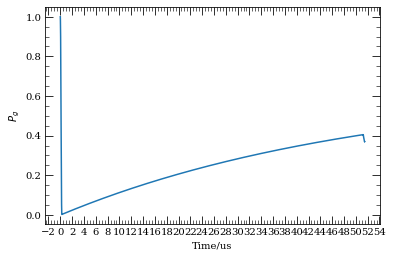

0.36997441977521406


In [219]:
psi0=g
Delta=600e6
Omega_ge=60e6
Omega_er=40e6
sigma=4.35e4

pipulse=0.25e-6 # For Rabi freq= 2 MHz

def pulse1(t,args):
    if (t<pipulse and t>0):
        return 1
    else:
        return 0


def pulse2(t,args):
    if (t>pipulse+args['gap'] and t<2*pipulse+args['gap']):
        return 1
    else:
        return 0
    
gap=51*1e-6
args = {'gap': gap}
    

delta_Dop=np.random.normal(0,sigma)
H0=2*np.pi*(delta_Dop*rho_rr+Delta*inte*inte.dag()+Omega_er/2*(inte*r.dag()+r*inte.dag())+(Omega_er**2-Omega_ge**2)/4/Delta*r*r.dag())
H1=2*np.pi*(Omega_ge/2*(g*inte.dag()+inte*g.dag()))

H=[H0,[H1,pulse2],[H1,pulse1]]
c_ops = [np.sqrt(gamma_r)*rho_gr,np.sqrt(gamma_bb)*rho_rpr,[np.sqrt(gamma_b)*rho_gg,pulse2],[np.sqrt(gamma_b)*rho_gg,pulse1]]

times=np.linspace(0,2*pipulse+args['gap'],6000)
result = mesolve(H, psi0, times,c_ops, [rho_gg],args=args)

fig, ax = plt.subplots()

ax.plot(times*1e6, result.expect[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xlabel('Time/us')
ax.set_ylabel('$P_g$')
plt.show()
print(result.expect[0][-1])

## Summary about the previous cell and next cell

Ramsey method for simulating Fig 2a. The previous cell is a display for a single data point in fig 2a, where gap time is 51 us and Pg decay to 1/e. The next is a Pg-gap time relation. The 1/T1 is measured by the method mentioned in Harry, 2018. And the simulation gives the same result--> $1/T1=1/Tr+1/T_{1013nm}$. I took $Tr=146 \, \mu s$, the same as theirs. A contradiction is that we used it as 230 us beforeward.


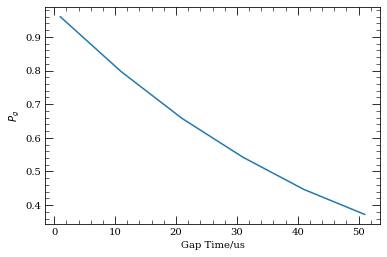

In [221]:
psi0=g
Delta=600e6
Omega_ge=60e6
Omega_er=40e6
sigma=4.35e4

pipulse=0.25e-6 # For Rabi freq= 2 MHz

fig2a_list=np.zeros(1)

def pulse1(t,args):
    if (t<pipulse and t>0):
        return 1
    else:
        return 0


def pulse2(t,args):
    if (t>pipulse+args['gap'] and t<2*pipulse+args['gap']):
        return 1
    else:
        return 0
    
gap_list=np.linspace(1,51,6)*1e-6
for gap in gap_list:
    
    args = {'gap': gap}
    
    delta_Dop=np.random.normal(0,sigma)
    H0=2*np.pi*(delta_Dop*rho_rr+Delta*inte*inte.dag()+Omega_er/2*(inte*r.dag()+r*inte.dag())+(Omega_er**2-Omega_ge**2)/4/Delta*r*r.dag())
    H1=2*np.pi*(Omega_ge/2*(g*inte.dag()+inte*g.dag()))

    H=[H0,[H1,pulse2],[H1,pulse1]]
    c_ops = [np.sqrt(gamma_r)*rho_gr,np.sqrt(gamma_bb)*rho_rpr,[np.sqrt(gamma_b)*rho_gg,pulse2],[np.sqrt(gamma_b)*rho_gg,pulse1]]

    times=np.linspace(0,2*pipulse+args['gap'],6000)
    result = mesolve(H, psi0, times,c_ops, [rho_gg],args=args)

    fig2a_list=np.hstack((result.expect[0][-1],fig2a_list))
    
fig, ax = plt.subplots()

ax.plot(gap_list*1e6, fig2a_list[::-1][1:7])
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel('Gap Time/us')
ax.set_ylabel('$P_g$')
plt.show()

## The next cell is to simulate the blue curve in Fig 2b

without an appropriate spin echo sequence, the T2 constant should be less than 5 us. The key noise source is the Doppler effect of a 10 uK.

In [451]:
psi0=g
Delta=600e6
Omega_ge=60e6
Omega_er=40e6
sigma=4.35e4
tweezer=0*18.7e6
pipulse=0.25e-6 # For Rabi freq= 2 MHz

def pulse1(t,args):
    if (t<pipulse/2 and t>0):
        return 1
    else:
        return 0


def pulse2(t,args):
    if (t>pipulse/2+args['gap'] and t<pipulse+args['gap']):
        return 1
    else:
        return 0

rep=100
gap_list=np.linspace(35,55,21)*0.1e-6
fig2b_orangelist=np.zeros(shape=(len(gap_list),rep))

c_ops = [np.sqrt(gamma_r)*rho_gr,np.sqrt(gamma_bb)*rho_rpr,[np.sqrt(gamma_b)*rho_gg,pulse2],[np.sqrt(gamma_b)*rho_gg,pulse1]]

for i in range(0,len(gap_list)):

    gap=gap_list[i]
    args = {'gap': gap}
    for j in range(0,rep):
        delta_Dop=np.random.normal(0,sigma)
        #delta_Dop=0
        H0=2*np.pi*(-tweezer*rho_gg+delta_Dop*rho_rr+Delta*inte*inte.dag()+Omega_er/2*(inte*r.dag()+r*inte.dag())+(Omega_er**2-Omega_ge**2)/4/Delta*r*r.dag())
        H1=2*np.pi*(tweezer*rho_gg+Omega_ge/2*(g*inte.dag()+inte*g.dag()))

        H=[H0,[H1,pulse2],[H1,pulse1]]
        times=np.linspace(0,pipulse+args['gap'],1000)

        result = mesolve(H, psi0, times,c_ops,[rho_gg],args=args)
    
        fig2b_orangelist[i][j]=result.expect[0][-1]
    print(fig2b_orangelist[i][0])

0.44926831848394966
0.4594836071771141
0.3325596878044962
0.2776550922652051
0.003402546167226497
0.10292842568339763
0.7701741699177498
0.6741015105318439
0.8863740883547928
0.7434447280715366
0.1842910168094562
0.17572241232111932
0.4184484423274324
0.15149577703112213
0.24941957202194157
0.812873174230118
0.4230154779977289
0.4695249938778604
0.007130458556211245
0.8588854715926908
0.25090543778698604


[0.48556562 0.73064329 0.75022916 0.58249431 0.35728809 0.23089339
 0.32507422 0.52799125 0.69502818 0.73308152 0.47897879 0.366391
 0.32525268 0.4905228  0.61397505 0.66130987 0.51283904 0.41339827
 0.337396   0.3569838  0.39752402]


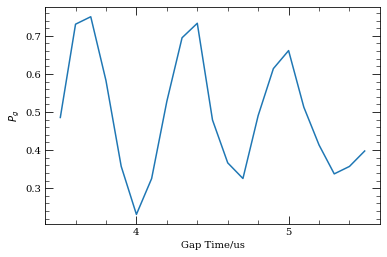

In [452]:
test=fig2b_orangelist.sum(axis=1)/rep
print(test)

fig, ax = plt.subplots()

ax.plot(gap_list*1e6, test)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Gap Time/us')
ax.set_ylabel('$P_g$')
plt.show()

## An easier way to calculate the $T_2^{*}$

The result in the previous cell matches with the measurement from Fig 2b. Our curve is from 3.5 us to 5.5 us, and the oscillation amplitude at 4.5 us is about 40%, whereas the value is 0.419 in Fig 2b. The curve looks ugly because I plotted only 20 points for 2 us, and the repetition (for Doppler) times is only 100 times. More datapoint or repetition takes too long. This simplified one can already take my laptop 30 mins. On the other hand, the oscillation frequency is not totally same as the Fig 2b blue curve. I guess it has to do with AC stark shift coming from the 420 nm laser and 808 nm laser. 420 nm is turned on only at gate operation. 808 nm is on only at gap time. I called them tweezer in the previous cell, but I don't know the exact value for this tweezer, which will act as a phase gate for GS. With an additional phase gate, the oscillation frequency will change, while it won't affect the amplitude.

As for the next cells, we simplified the process by following the process given by Harry, 2018. Without any additional energy difference betweeen g and r, any decay process and only with a Gaussian Doppler effect, we can only find an amplitude Gaussian envelope for the $T_2^{*}$ process. At 4.5 us, the resulting oscillation amplitude inside the envelope is 46%, a little bit bigger than the 0.419 in Fig 2b. The advantage of the method is that it is much quicker than simulating the whole Ramsey process. I can repeat the Doppler noise for thousands of times.

I guess they used a theoretical approach to calculate the Gaussian envelope, instead of doing a time consuming Monte Carlo numerics simulation.

btw, I did not take SPAM errors into consideration.

In [437]:
Delta=600e6
Omega_ge=60e6
Omega_er=40e6
sigma=4.35e4
pipulse=0.25e-6

rep=2000
timepoint=71
gap_list=np.linspace(1,timepoint,15)*0.1e-6
fig2b_orangelist=np.zeros(shape=(len(gap_list),rep))


for i in range(0,len(gap_list)):

    gap=gap_list[i]
    for j in range(0,rep):
        delta_Dop=np.random.normal(0,sigma)
        #delta_Dop=0
        psi0=1/np.sqrt(2)*(g+np.exp(1j*2*np.pi*(delta_Dop)*gap)*1j*r)

        H0=2*np.pi*(Delta*inte*inte.dag()+Omega_er/2*(inte*r.dag()+r*inte.dag())+(Omega_er**2-Omega_ge**2)/4/Delta*r*r.dag())
        H1=2*np.pi*(Omega_ge/2*(g*inte.dag()+inte*g.dag()))
        H=H0+H1

        times=np.linspace(0,pipulse/2,20)
        result = mesolve(H, psi0, times,[],[rho_gg])
    
        fig2b_orangelist[i][j]=result.expect[0][-1]
    print(fig2b_orangelist[i][0])

0.0003832282619984631
0.013847539337784227
0.013105403471108086
0.008548091027938408
0.010979161790186237
0.13686633059498768
0.013411270639936218
0.0033260137942294227
0.1574508687601846
0.957352017999735
0.0006744595820759429
0.16132877668739914
0.6538468576177127
0.1263047356039347
0.13606914699930722


[2.00176679e-04 6.68486193e-03 2.25798476e-02 4.35832300e-02
 7.38545650e-02 1.14274710e-01 1.49974051e-01 1.90121549e-01
 2.41999707e-01 2.67218190e-01 2.99414260e-01 3.50153733e-01
 3.58147524e-01 4.00806688e-01 4.21213636e-01]


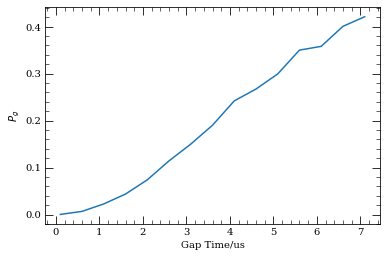

In [438]:
test=fig2b_orangelist.sum(axis=1)/rep
print(test)

fig, ax = plt.subplots()

ax.plot(gap_list*1e6, test)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Gap Time/us')
ax.set_ylabel('$P_g$')
plt.show()